Create two random data sets with two features and two classes

Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/priject1/lab4/Data.csv"

Consider that you are given a car height and you have the class label as 1 if cost of car is greater than 550 and 0 if it is less than or equal to 550.

In [ ]:
data = pd.read_csv(path).to_numpy()

# Create the labels from the data

In [ ]:
label = []
x_c1 = []
x_c2 = []
c1_count = 0
c2_count = 0
for i in range(data.shape[0]):
  if(data[i][1] > 550):
    label.append(1)
    x_c1.append(data[i][0])
    c1_count += 1
  else:
    label.append(0)
    x_c2.append(data[i][0])
    c2_count += 1

# Plotting the distribution of samples.

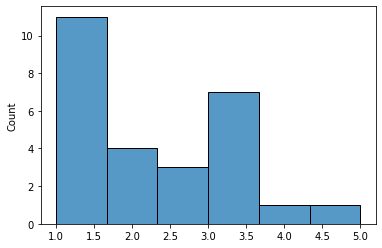

In [ ]:
import seaborn as sns
x = data[:,0]
sns.histplot(x)
#Not a preferred way to plot distribution

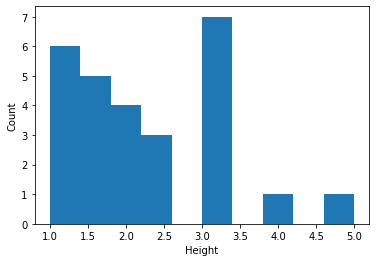

In [ ]:
#This gives a clear idea
plt.hist(x)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

# Prior Probabilities for both the classes

In [ ]:
no_of_samples = len(data)
prob_c1 = c1_count/no_of_samples
prob_c2 = c2_count/no_of_samples
print("Prior Class 1:",prob_c1)
print("Prior Class 2:",prob_c2)

Prior Class 1: 0.8518518518518519
Prior Class 2: 0.14814814814814814


# Unique Values

In [ ]:
from collections import Counter
unique_c1 = Counter(x_c1).keys() 
count_unique_c1 = list(Counter(x_c1).values()) 
unique_c2 = Counter(x_c2).keys() 
count_unique_c2 = list(Counter(x_c2).values()) 

Plot the count of each unique element of the feature

In [ ]:
unique_c1

dict_keys([3.0, 4.0, 2.0, 1.0, 1.5, 2.5])

In [ ]:
count_unique_c1

[6, 1, 4, 5, 5, 2]

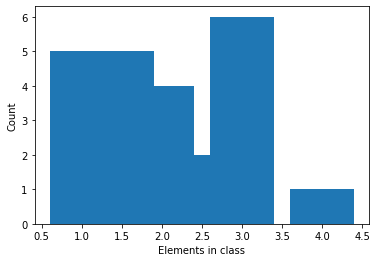

In [ ]:
#Not a preferred way to plot distribution
plt.bar(unique_c1,count_unique_c1)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

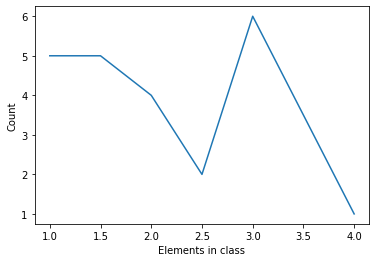

In [ ]:
sns.lineplot(list(unique_c1),count_unique_c1)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

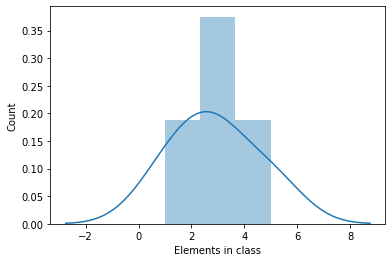

In [ ]:
#Probability distribution of x_c2
sns.distplot(x_c2)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

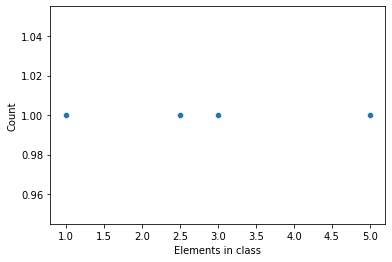

In [ ]:
#Plot for the unique values in class c2
sns.scatterplot(list(unique_c2),count_unique_c2)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

# Likelihood

Plot P(x|C1) and P(x|C2)

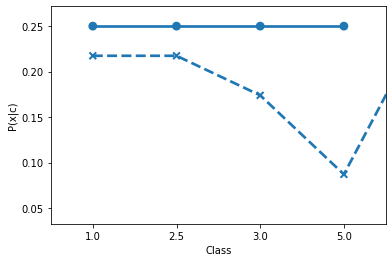

In [ ]:
#sns.color_palette("Paired", 9)
y1 = np.array(count_unique_c1)/len(x_c1)
sns.pointplot(list(unique_c1),y1, linestyles="--",markers =['x'] )
y2 = np.array(count_unique_c2)/len(x_c2)
sns.pointplot(list(unique_c2),y2,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(x|c)")
plt.show()

# Posterior Probability

In [ ]:
P_c1_x = prob_c1*y1

In [ ]:
P_c2_x = prob_c2*y2

In [ ]:
y1

array([0.26086957, 0.04347826, 0.17391304, 0.2173913 , 0.2173913 ,
       0.08695652])

Plot P(C1|x) and P(C2|x)

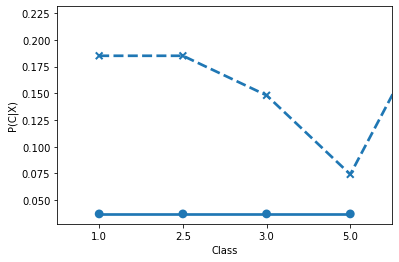

In [ ]:
sns.pointplot(list(unique_c1),P_c1_x, linestyles="--",markers =['x'] )
sns.pointplot(list(unique_c2),P_c2_x,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(C|X)")
plt.show()

# Dataset 2

Read dataset. c1 contains two features of class 1 and c2 contains the two features for class 2. 

In [ ]:
class1_train = pd.read_csv('/content/drive/MyDrive/priject1/lab4/c1.csv').to_numpy()
class2_train = pd.read_csv('/content/drive/MyDrive/priject1/lab4/c2.csv').to_numpy()

Print the data

In [ ]:
print(class1_train.shape)
print(class1_train)
print(type(class2_train))
print(class2_train.shape)
print(type(class1_train))
print(class2_train)

(160, 2)
[[ 3.20478053e-01  4.81092097e-01]
 [ 5.06909985e-02  9.63995041e-02]
 [ 3.74846984e+00  4.03931041e-01]
 [ 2.25637447e+00  2.08996208e+00]
 [ 1.42145382e+00  1.24362901e+00]
 [ 4.08062705e-01  9.24810050e-01]
 [ 1.60681941e+00  4.75268430e-01]
 [ 1.57397678e+00  1.60394699e+00]
 [ 1.73121450e+00  2.43452464e+00]
 [ 9.30696141e-01  2.12345759e-01]
 [ 1.43750641e+00 -2.84913595e-01]
 [-4.91480512e-01  2.70506180e-01]
 [ 2.35052206e+00  2.34923853e+00]
 [ 1.06032568e+00  2.25909849e-01]
 [ 2.23321779e+00  1.18800751e+00]
 [-3.36602971e-01  8.26100949e-01]
 [ 1.21051794e+00  3.59324046e-01]
 [ 1.95878231e+00  2.81435856e+00]
 [ 5.35856323e-01 -1.54336636e-01]
 [ 2.89423945e+00  1.71311383e+00]
 [ 1.38569352e+00  1.74692600e+00]
 [ 1.27854113e+00 -3.70841388e-01]
 [-9.07354159e-02  2.42044784e+00]
 [ 9.07143282e-01  5.69730755e-01]
 [ 2.28848082e+00  1.68559588e+00]
 [-1.53479431e-01 -3.95808482e-01]
 [ 2.40208659e+00  4.41623125e-01]
 [ 1.21455553e+00  1.51675544e+00]
 [ 3.150590

# Plotting the distribution of samples.

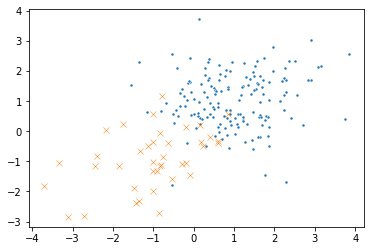

In [ ]:
import seaborn as sns
sns.scatterplot(class1_train[:,0],class1_train[:,1],marker='.')
sns.scatterplot(class2_train[:,0],class2_train[:,1],marker='x')
plt.show()

Determine Prior Probabilities

In [ ]:
no_of_samples = len(class1_train)+len(class2_train)

In [ ]:
prob_c1 = len(class1_train)/no_of_samples
prob_c1

0.8040201005025126

In [ ]:
prob_c2 = len(class2_train)/no_of_samples
prob_c2

0.19597989949748743

Plotting the prior

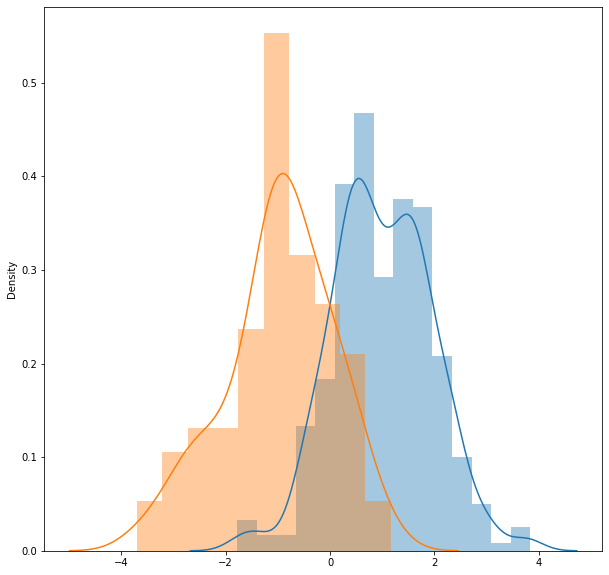

In [ ]:
#Requires proper labelling
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
sns.distplot(class1_train,label='C1')
sns.distplot(class2_train)
plt.show()

Plot the data distribution and the histogram of feature 1 and feature 2 in the x axis and the y -axis respectively. The distribution of feature 1 wil be along the top of the x-axis and feature 2 along the right of the y axis.

In [ ]:
from collections import Counter
x_c1 = class1_train[:,0]
unique_c1 = Counter(x_c1).keys() 
count_unique_c1 = list(Counter(x_c1).values()) 
x_c2 = class2_train[:,0]
unique_c2 = Counter(x_c2).keys() 
count_unique_c2 = list(Counter(x_c2).values()) 

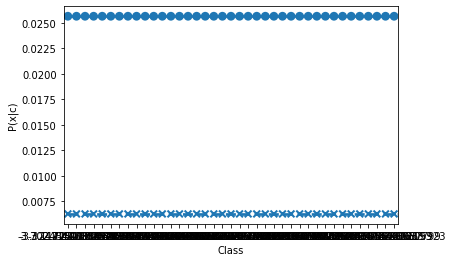

In [ ]:
#sns.color_palette("Paired", 9)
y1 = np.array(count_unique_c1)/len(x_c1)
sns.pointplot(list(unique_c1),y1, linestyles="--",markers =['x'] )
y2 = np.array(count_unique_c2)/len(x_c2)
sns.pointplot(list(unique_c2),y2,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(x|c)")
plt.show()

# Plot the Posterior Probability for each class

In [ ]:
P_c1_x = prob_c1*y1

In [ ]:
P_c2_x = prob_c1*y2

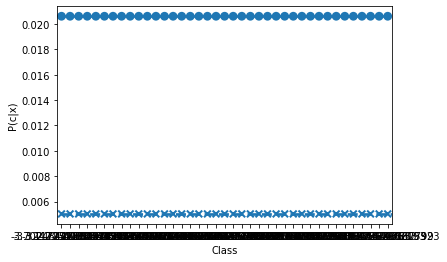

In [ ]:
sns.pointplot(list(unique_c1),P_c1_x, linestyles="--",markers =['x'] )
sns.pointplot(list(unique_c2),P_c2_x,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(c|x)")
plt.show()

Plot the histogram of C1

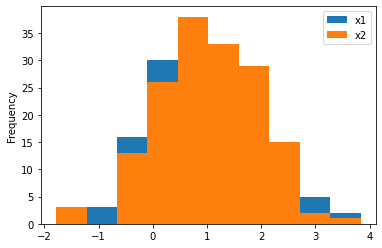

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.DataFrame(class1_train, columns=['x1', 'x2'])
df.plot.hist();

Plot the histogram of C2

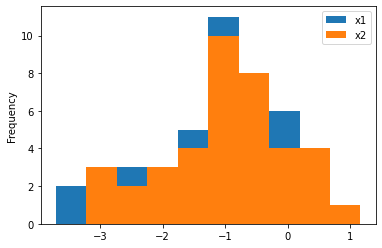

In [ ]:
df = pd.DataFrame(class2_train, columns=['x1', 'x2'])
df.plot.hist();

# In the report please explain the plots that you are getting clearly explaining the reason .